In [13]:
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import GlobalAvgPool2D
from keras.preprocessing import image
from tensorflow.keras import datasets, layers, models, losses
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_set = pd.read_csv('/content/drive/MyDrive/Mtech Project/Dataset/Messidor/train.csv')    # reading the csv file
train_set.head() 

,Image,Id,Risk of macular edema
0,20051213_62188_0100_PP.tif,2,0
1,20051020_62615_0100_PP.tif,2,0
2,20051202_41238_0400_PP.tif,1,0
3,20060522_45455_0100_PP.tif,2,0
4,20060530_36895_0100_PP.tif,3,2


In [4]:
train_image = []

for i in tqdm(range(train_set.shape[0])):
    img = image.load_img('../content/drive/MyDrive/Mtech Project/Dataset/Messidor/train/' + train_set['Image'][i],target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

X = np.array(train_image)

100%|██████████| 960/960 [10:32<00:00,  1.52it/s]


(960, 224, 224, 3)


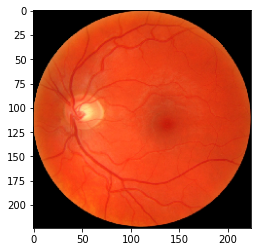

In [5]:
print(X.shape)
plt.imshow(X[2])

In [6]:
test_set =  pd.read_csv('/content/drive/MyDrive/Mtech Project/Dataset/Messidor/test.csv')    # reading the csv file
test_set.head() 

,Image,Id,Risk of macular edema
0,20060410_44464_0200_PP.tif,0,0
1,20051213_61892_0100_PP.tif,0,0
2,20051020_53062_0100_PP.tif,3,2
3,20051116_58835_0400_PP.tif,3,1
4,20051214_51811_0100_PP.tif,3,1


In [7]:
test_image = []

for i in tqdm(range(test_set.shape[0])):
    img = image.load_img('../content/drive/MyDrive/Mtech Project/Dataset/Augmented Messidor*5/test/' + test_set['Image'][i],target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)

Y = np.array(test_image)

100%|██████████| 240/240 [02:26<00:00,  1.64it/s]


In [8]:
Y.shape

(240, 224, 224, 3)

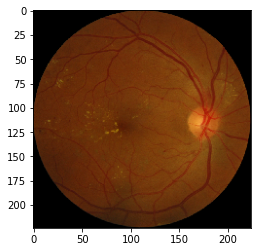

In [9]:
plt.imshow(Y[2])

In [10]:
y = np.array(train_set.drop(['Image', 'Id'],axis=1))
y.shape

(960, 1)

In [11]:
print(X.shape)
print(Y.shape)
print(y.shape)

(960, 224, 224, 3)
(240, 224, 224, 3)
(960, 1)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(864, 224, 224, 3)
(96, 224, 224, 3)
(864, 1)
(96, 1)


In [14]:
InceptionV3_model= tf.keras.applications.InceptionV3(
                    include_top=False,
                    weights="imagenet",
                    input_tensor=None,
                    input_shape=None,
                    pooling=None,
                    classes=1000,
                    classifier_activation="softmax",
                )

87924736/87910968 [==============================] - 2s 0us/step


In [16]:
InceptionV3_model.trainable = False
model = models.Sequential()
model.add(InceptionV3_model)

In [17]:
model.add(GlobalAvgPool2D())
model.add(Dense(units=4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, None, None, 2048)  21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 8196      
Total params: 21,810,980
Trainable params: 8,196
Non-trainable params: 21,802,784
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
print("Hyperparameters : {} \n".format(model.optimizer.get_config()))

Hyperparameters : {'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False} 



In [19]:
history = model.fit(X_train, y_train,
          batch_size=4,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
216/216 [==============================] - 96s 422ms/step - loss: 0.6478 - accuracy: 0.8090 - val_loss: 0.5262 - val_accuracy: 0.8438
Epoch 2/10
216/216 [==============================] - 91s 423ms/step - loss: 0.4687 - accuracy: 0.8576 - val_loss: 0.4643 - val_accuracy: 0.8542
Epoch 3/10
216/216 [==============================] - 92s 425ms/step - loss: 0.4427 - accuracy: 0.8611 - val_loss: 0.4959 - val_accuracy: 0.8438
Epoch 4/10
216/216 [==============================] - 91s 423ms/step - loss: 0.3902 - accuracy: 0.8704 - val_loss: 0.4856 - val_accuracy: 0.8542
Epoch 5/10
216/216 [==============================] - 91s 421ms/step - loss: 0.3499 - accuracy: 0.8819 - val_loss: 0.4987 - val_accuracy: 0.8646
Epoch 6/10
216/216 [==============================] - 91s 422ms/step - loss: 0.3352 - accuracy: 0.8831 - val_loss: 0.4840 - val_accuracy: 0.8750
Epoch 7/10
216/216 [==============================] - 91s 423ms/step - loss: 0.2870 - accuracy: 0.9074 - val_loss: 0.5236 - val_ac

In [21]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Hyperparameters : {} \n".format(model.optimizer.get_config()))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Hyperparameters : {'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False} 

Test loss: 0.8619015216827393
Test accuracy: 0.6666666865348816


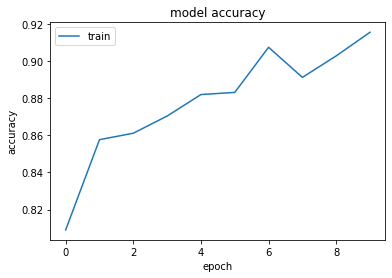

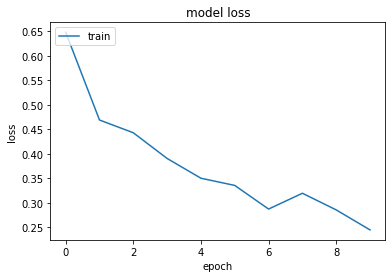

In [22]:
#Plotting the graph of accuracy VS epoch
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

#Plotting the graph of loss VS epoch
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()